In [54]:
import numpy as np
from scipy.signal import correlate
from scipy.io import wavfile as wav
import scipy.linalg as linalg

In [97]:
audio_original = "disposable_heroes2.wav"
audio_grabado = "metallica.wav"


sample_rate1, audio_original = wav.read(audio_original)
sample_rate2, audio_grabado = wav.read(audio_grabado)

audio_original = audio_original / 32767
audio_grabado = audio_grabado / 32767
audio_original -= np.mean(audio_original)
audio_grabado -= np.mean(audio_grabado)
audio_grabado = audio_grabado.mean(axis=1).astype(audio_grabado.dtype)

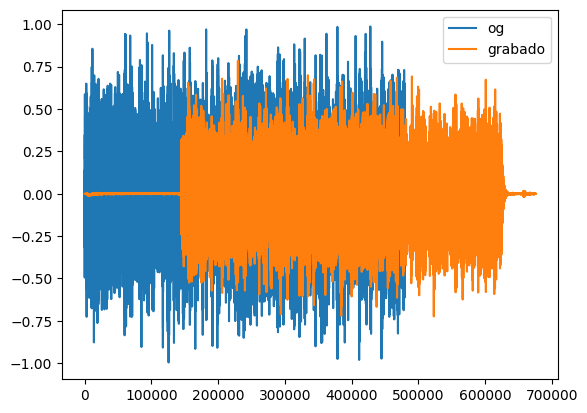

In [80]:

import matplotlib.pyplot as plt
plt.plot(audio_original, label= 'og')
plt.plot(audio_grabado, label = 'grabado')
plt.legend()
plt.show()

In [85]:
relleno = len(audio_grabado)-len(audio_original)
audio_original2 = np.concatenate((np.zeros(relleno),audio_original))
xcorr = correlate(audio_grabado / np.max(abs(audio_grabado)), audio_original2 / np.max(abs(audio_original2))) #sin normalizar creo da raro
delay = np.abs((len(xcorr) // 2) - np.argmax(np.abs(xcorr))) #mi amigo el chato
#audio_grabado = np.concatenate((audio_grabado[delay:], np.zeros(delay)))

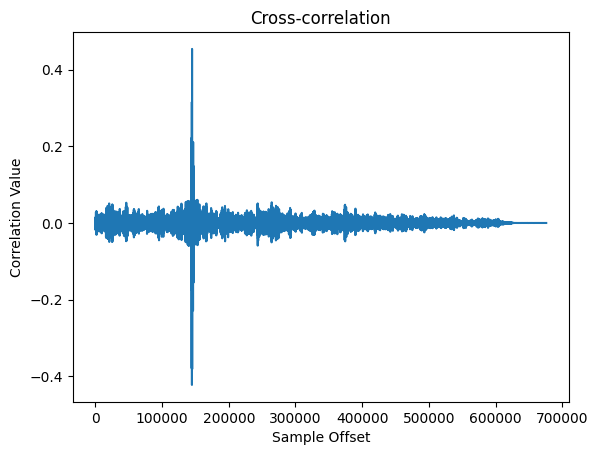

Delay in samples: 144996
Delay in seconds: 3.02075 seconds


In [120]:
# Calculate the phase correlation between the two signals
sig1 = audio_grabado
sig2 = np.concatenate((audio_original,np.zeros(len(audio_grabado)-len(audio_original))))

sig1 = sig1 / np.linalg.norm(sig1)
sig2 = sig2 / np.linalg.norm(sig2)


cross_correlation = correlate(sig1, sig2)

# Find the time delay (in samples) corresponding to the maximum phase correlation
delay_samples = np.argmax(cross_correlation)-int(len(sig1)-1)

# Calculate the time delay in seconds
delay_seconds = delay_samples / 48000

# Plot the cross-correlation result
plt.plot(cross_correlation[int((len(cross_correlation)+1)/2):])
plt.title("Cross-correlation")
plt.xlabel("Sample Offset")
plt.ylabel("Correlation Value")
plt.show()

print(f"Delay in samples: {delay_samples}")
print(f"Delay in seconds: {delay_seconds} seconds")

In [124]:
delay_samples/48000

audio_grabado = sig1[delay_samples:delay_samples+480000]
audio_original = sig2

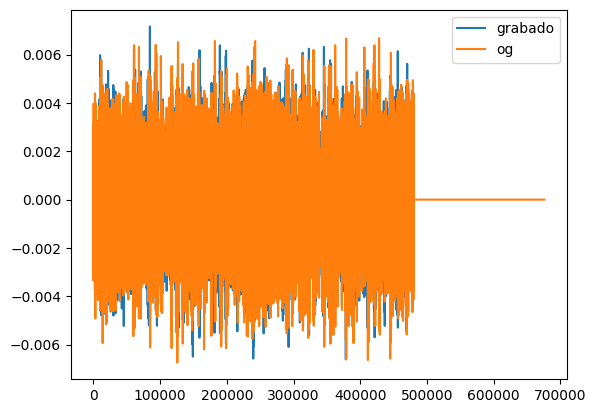

In [128]:

plt.plot(audio_grabado, label= 'grabado')
plt.plot(audio_original, label = 'og')
plt.legend()
plt.show()

In [131]:
r = correlate(audio_original, audio_original)
p = correlate(audio_grabado, audio_original)
var_grabado = np.var(audio_grabado)
M = 100000
wo = linalg.solve_toeplitz(r[:M],p[:M])
Jo = np.var(audio_grabado) - p[:M]*wo
Epsilon = Jo/np.var(audio_grabado)

In [132]:
convolved_result = np.convolve(audio_original, wo, mode='same')

# Define the sample rate (48 kHz in this case)
sample_rate = 48000

# Scale the array to be in the range of -32768 to 32767 (16-bit PCM audio)
convolved_result_scaled = np.int16(convolved_result * 32767)

# Specify the output WAV file name
output_file = "convolved_output.wav"

# Save the array as a WAV file
wav.write(output_file, sample_rate, convolved_result_scaled)

print(f"Saved convolved data as {output_file} with a sample rate of {sample_rate} Hz.")

Saved convolved data as convolved_output.wav with a sample rate of 48000 Hz.
